In [2]:
## LUIZ HENRIQUE MARCUCCI - 10395609
## JOÃO VICTOR MORAES DE SOUZA - 10375333

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [5]:

file_path = "/content/diabetes.csv"
df = pd.read_csv(file_path, delimiter=";")

In [6]:
df.shape

(1000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [8]:
print(df.head())

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


In [9]:
#ESTATISTICAS DESCRITIVAS
descriptive_stats = df.describe()
print(descriptive_stats)

                ID     No_Pation          AGE         Urea           Cr  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean    340.500000  2.705514e+05    53.528000     5.124743    68.943000   
std     240.397673  3.380758e+06     8.799241     2.935165    59.984747   
min       1.000000  1.230000e+02    20.000000     0.500000     6.000000   
25%     125.750000  2.406375e+04    51.000000     3.700000    48.000000   
50%     300.500000  3.439550e+04    55.000000     4.600000    60.000000   
75%     550.250000  4.538425e+04    59.000000     5.700000    73.000000   
max     800.000000  7.543566e+07    79.000000    38.900000   800.000000   

             HbA1c         Chol           TG          HDL          LDL  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      8.281160     4.862820     2.349610     1.204750     2.609790   
std       2.534003     1.301738     1.401176     0.660414     1.115102   
min       0.900000     0.000

In [10]:
#tratamento das colunas

df["Gender"]=df["Gender"].str.strip().str.upper()
df["Gender"].unique()

df["Gender"]=df["Gender"].replace({"M":0,"F":1})
df.head(5)

<ipython-input-10-4d617a13dabc>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"]=df["Gender"].replace({"M":0,"F":1})


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [11]:
#tratamento para deixar a classificacao mais intuitiva
df['CLASS'] = df['CLASS'].astype(str)

df['CLASS'] = df['CLASS'].str.strip()


valores = {
    'N': 'Non-diabetic',
    'P': 'Prediabetic',
    'Y': 'Diabetic'
}

df['CLASS'] = df['CLASS'].map(valores)
print(df['CLASS'].unique())

['Non-diabetic' 'Prediabetic' 'Diabetic']


In [12]:
#tranformando classificacoes de diabeticos por numeros
df["CLASS"]=df["CLASS"].astype("category")
df['CLASS_CODE'] = df['CLASS'].cat.codes

In [13]:
print(df.head())

    ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221       0   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223       0   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI         CLASS  CLASS_CODE  
0  24.0  Non-diabetic           1  
1  23.0  Non-diabetic           1  
2  24.0  Non-diabetic           1  
3  24.0  Non-diabetic           1  
4  21.0  Non-diabetic           1  


In [14]:
# prompt: select distinct values from CLASS e CLASS_CODE

print(df[['CLASS', 'CLASS_CODE']].drop_duplicates())

            CLASS  CLASS_CODE
0    Non-diabetic           1
103   Prediabetic           2
156      Diabetic           0


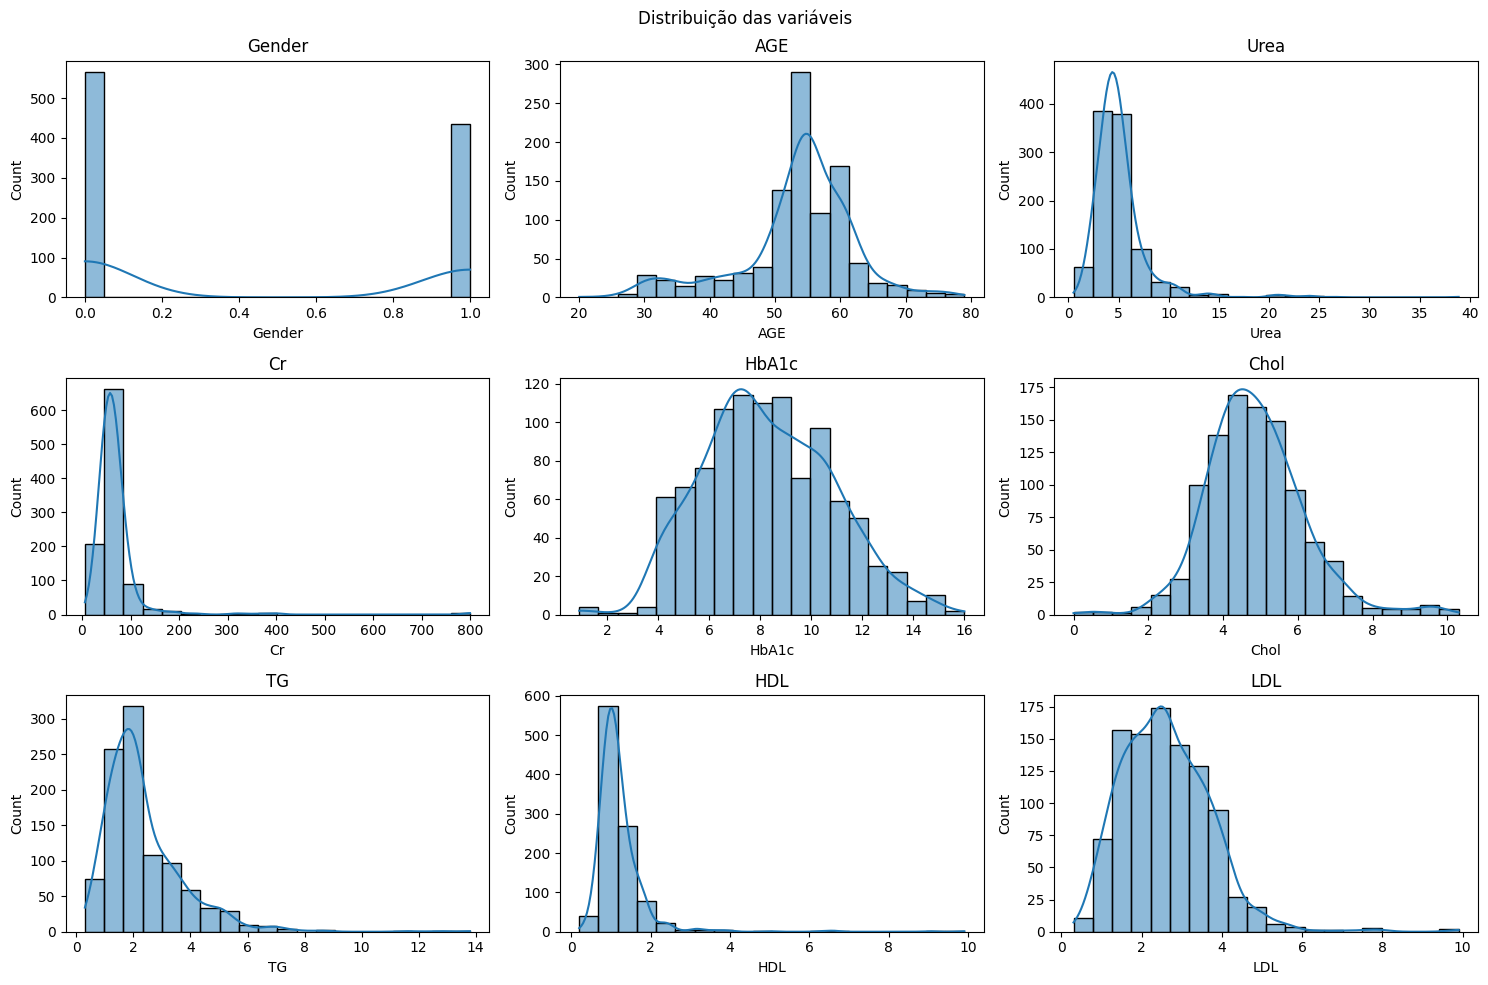

In [15]:
# Histograma das principais variáveis
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle("Distribuição das variáveis")

cols = ["Gender", "AGE", "Urea", "Cr",
        "HbA1c", "Chol", "TG", "HDL", "LDL", "VLDL", "BMI", "CLASS"]

for ax, col in zip(axes.flatten(), cols):
    sns.histplot(df[col], bins=20, kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

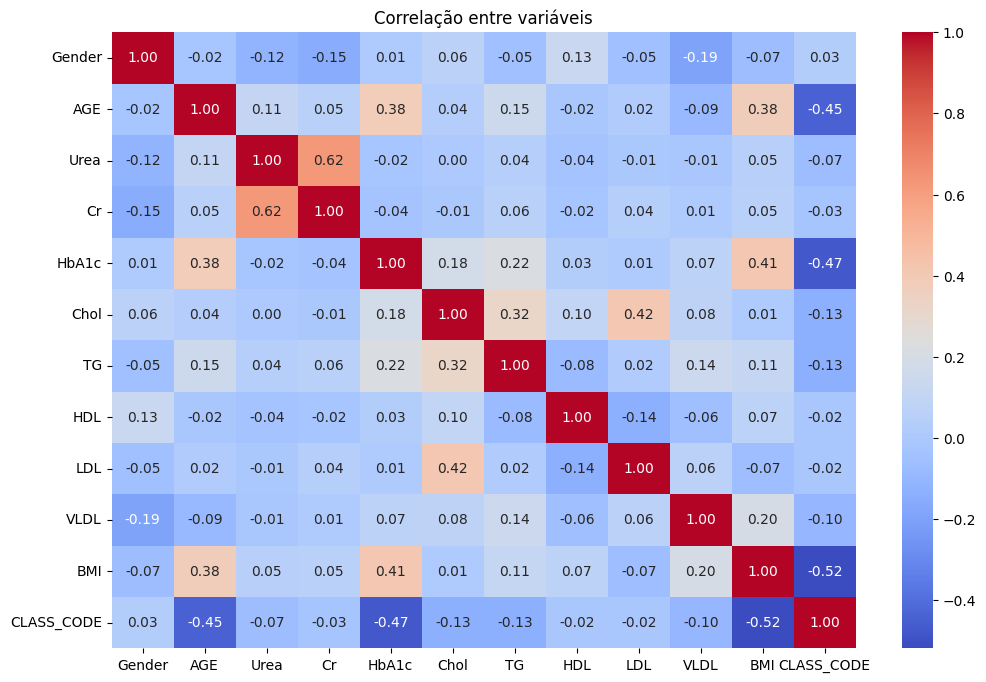

In [24]:
#MATRIZ DE CORRELAÇÃO
df_sem_id = df.drop(columns=['ID', 'No_Pation', 'CLASS'])
plt.figure(figsize=(12, 8))
sns.heatmap(df_sem_id.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlação entre variáveis")
plt.show()

In [25]:
#modelagem para crição da arvore de decisao

X = df_sem_id.drop('CLASS_CODE', axis=1)
y = df_sem_id['CLASS_CODE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [26]:
y_pred = dt_classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.9866666666666667

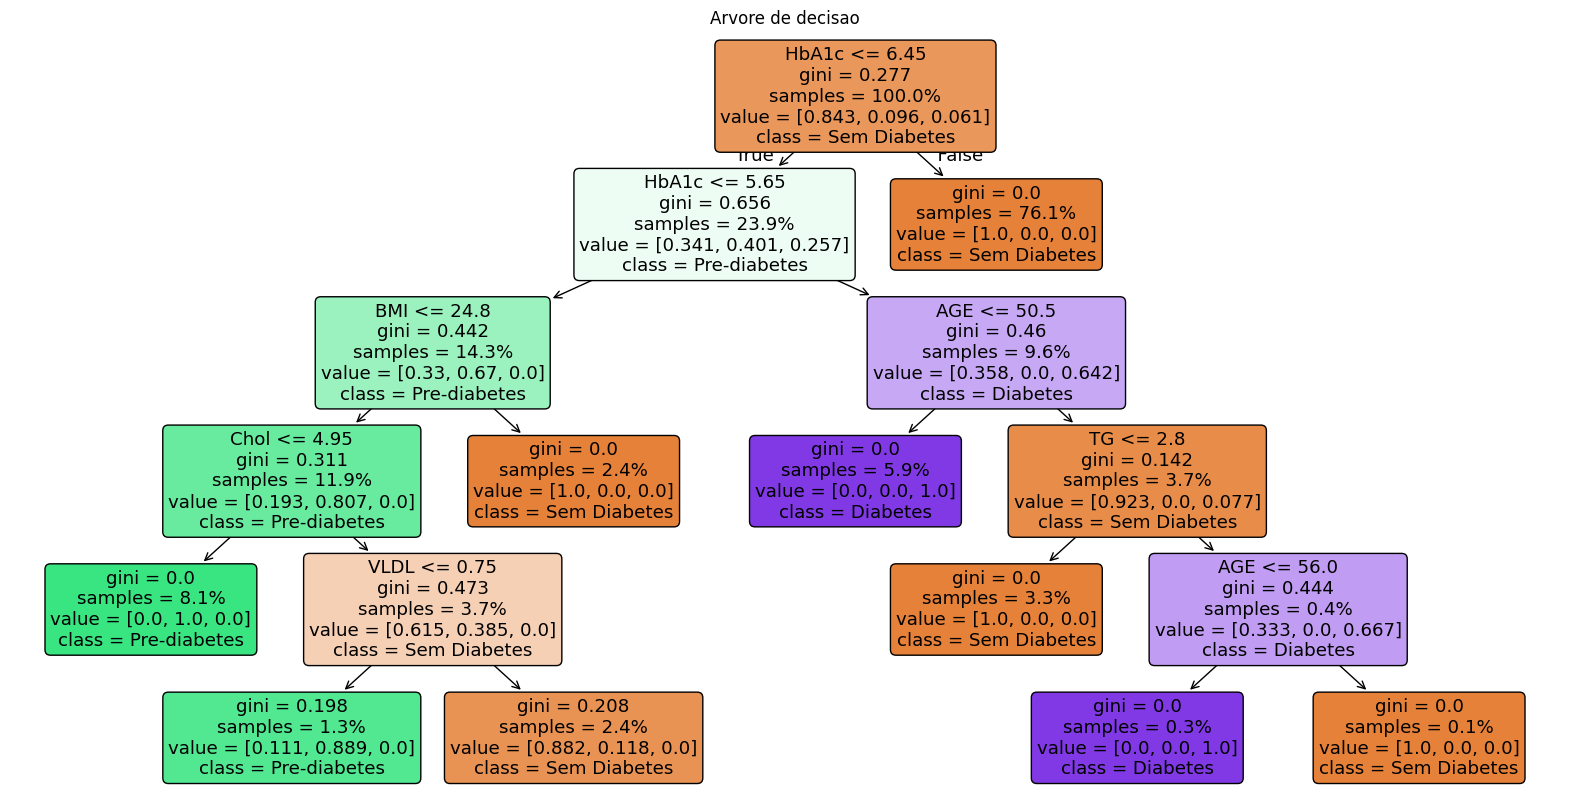

In [28]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,feature_names=X.columns,class_names=['Sem Diabetes', 'Pre-diabetes', 'Diabetes'], filled=True,rounded=True,proportion=True)
plt.title("Arvore de decisao")
plt.show()

In [31]:
#Adicionando Valores Randomicos para fazer a Predição
random_sample = pd.DataFrame({

    'Gender': [np.random.choice(['M', 'F'])],
    'AGE': [np.random.randint(20, 70)],
    'Urea': [np.random.uniform(2.0, 8.0)],
    'Cr': [np.random.randint(30, 100)],
    'HbA1c': [np.random.uniform(3.5, 10.0)],
    'Chol': [np.random.uniform(3.0, 7.0)],
    'TG': [np.random.uniform(0.5, 5.0)],
    'HDL': [np.random.uniform(0.5, 2.0)],
    'LDL': [np.random.uniform(1.0, 5.0)],
    'VLDL': [np.random.uniform(0.1, 1.5)],
    'BMI': [np.random.uniform(18, 35)]
})

random_sample['Gender'] = random_sample['Gender'].map({'M': 1, 'F': 0})

prediction = dt_classifier.predict(random_sample)
prediction_proba = dt_classifier.predict_proba(random_sample)

class_mapping = {0: 'Sem Diabetes', 1: 'Pre Diabetes', 2: 'Diabetes'}

print("\nValores Randomicos:")
print(random_sample)
print("\nPredicao:", class_mapping[prediction[0]])
for i, prob in enumerate(prediction_proba[0]):
    print(f"{class_mapping[i]}: {prob:.2%}")


Valores Randomicos:
   Gender  AGE      Urea  Cr     HbA1c      Chol        TG       HDL  \
0       0   39  4.442829  45  5.371775  6.830008  2.776825  1.131591   

        LDL      VLDL        BMI  
0  3.304813  1.429789  22.682345  

Predicao: Sem Diabetes
Sem Diabetes: 88.24%
Pre Diabetes: 11.76%
Diabetes: 0.00%
